In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Importing dataset
main = pd.read_csv('train.csv', index_col='id')
df = main

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
for col in df.columns:
    print(f'Column {col} has {len(df[col].unique())}')

Column CustomerId has 23221
Column Surname has 2797
Column CreditScore has 457
Column Geography has 3
Column Gender has 2
Column Age has 71
Column Tenure has 11
Column Balance has 30075
Column NumOfProducts has 4
Column HasCrCard has 2
Column IsActiveMember has 2
Column EstimatedSalary has 55298
Column Exited has 2


In [8]:
df.duplicated().count()
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(165034, 13)

In [10]:
df=df.drop(columns=['CustomerId','Surname'],axis=1)

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [13]:
quants=['CreditScore','Age','Balance','EstimatedSalary']
cats=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
target='Exited'

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


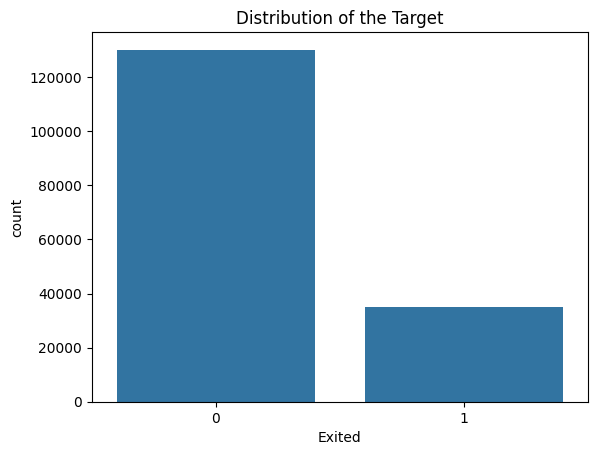

In [15]:
#Checking for imbalance
sns.countplot(data=main,x="Exited")
plt.title("Distribution of the Target")
plt.show()

Dataset is severly imbalanced

In [16]:
number_of_ones = sum(df['Exited']==1)

In [17]:
df_zeros=df.loc[df['Exited']==0,:]
df_ones=df.loc[df['Exited']==1,:]

In [18]:
df_downsample=df_zeros.sample(n=number_of_ones,random_state=100)

In [19]:
df_downsample.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
155431,629,Spain,Male,23.0,2,97318.25,1,0.0,0.0,122925.44,0
128434,718,France,Female,27.0,3,0.00,2,1.0,1.0,4470.52,0
116135,652,France,Female,33.0,7,0.00,2,1.0,0.0,55775.62,0
95326,779,Spain,Female,29.0,7,0.00,2,1.0,1.0,103764.85,0
149882,693,Spain,Male,55.0,5,0.00,2,1.0,1.0,38257.89,0


In [20]:
df_downsample.shape

(34921, 11)

In [21]:
frames=[df_ones,df_downsample]
df=pd.concat(frames)

print(df.shape)

(69842, 11)


In [22]:
#Checking for unique values
for cat in cats:
    print(cat,df[cat].unique())

Geography ['Germany' 'France' 'Spain']
Gender ['Male' 'Female']
Tenure [ 4  8  1  9  0  5  3  6  2 10  7]
NumOfProducts [1 2 3 4]
HasCrCard [1. 0.]
IsActiveMember [0. 1.]


## Train Test Splitting

In [24]:
X=df.drop(columns='Exited',axis=1)
Y=df['Exited']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [24]:
df = x_train
df['Exited']=y_train

# Descriptive Analysis

In [25]:
count=0
for i in y_train:
    if i==0:
        count+=1

In [26]:
print(f"Number of customers who haven't exited {count}")
print(f"Number of customers who have exited {len(y_train) - count}")

Number of customers who haven't exited 27877
Number of customers who have exited 27996


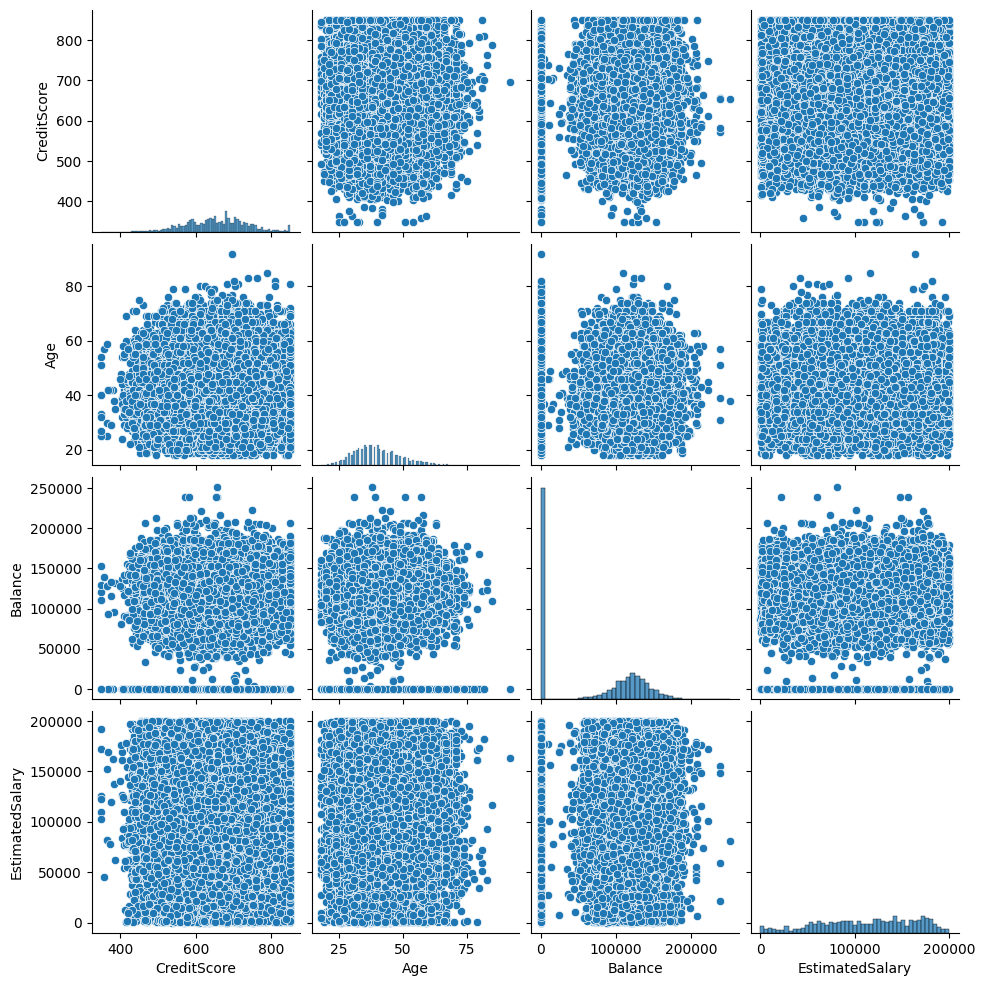

In [27]:
sns.pairplot(df[quants])

<Axes: >

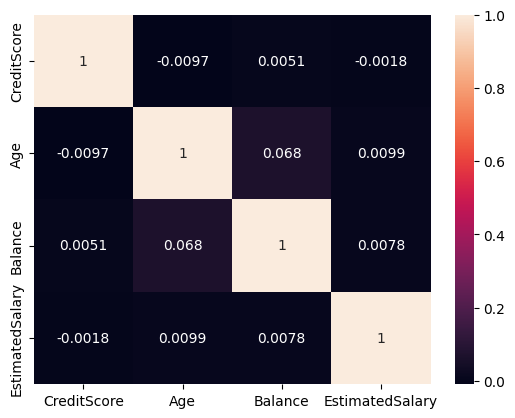

In [28]:
sns.heatmap(df[quants].corr(),annot=True)

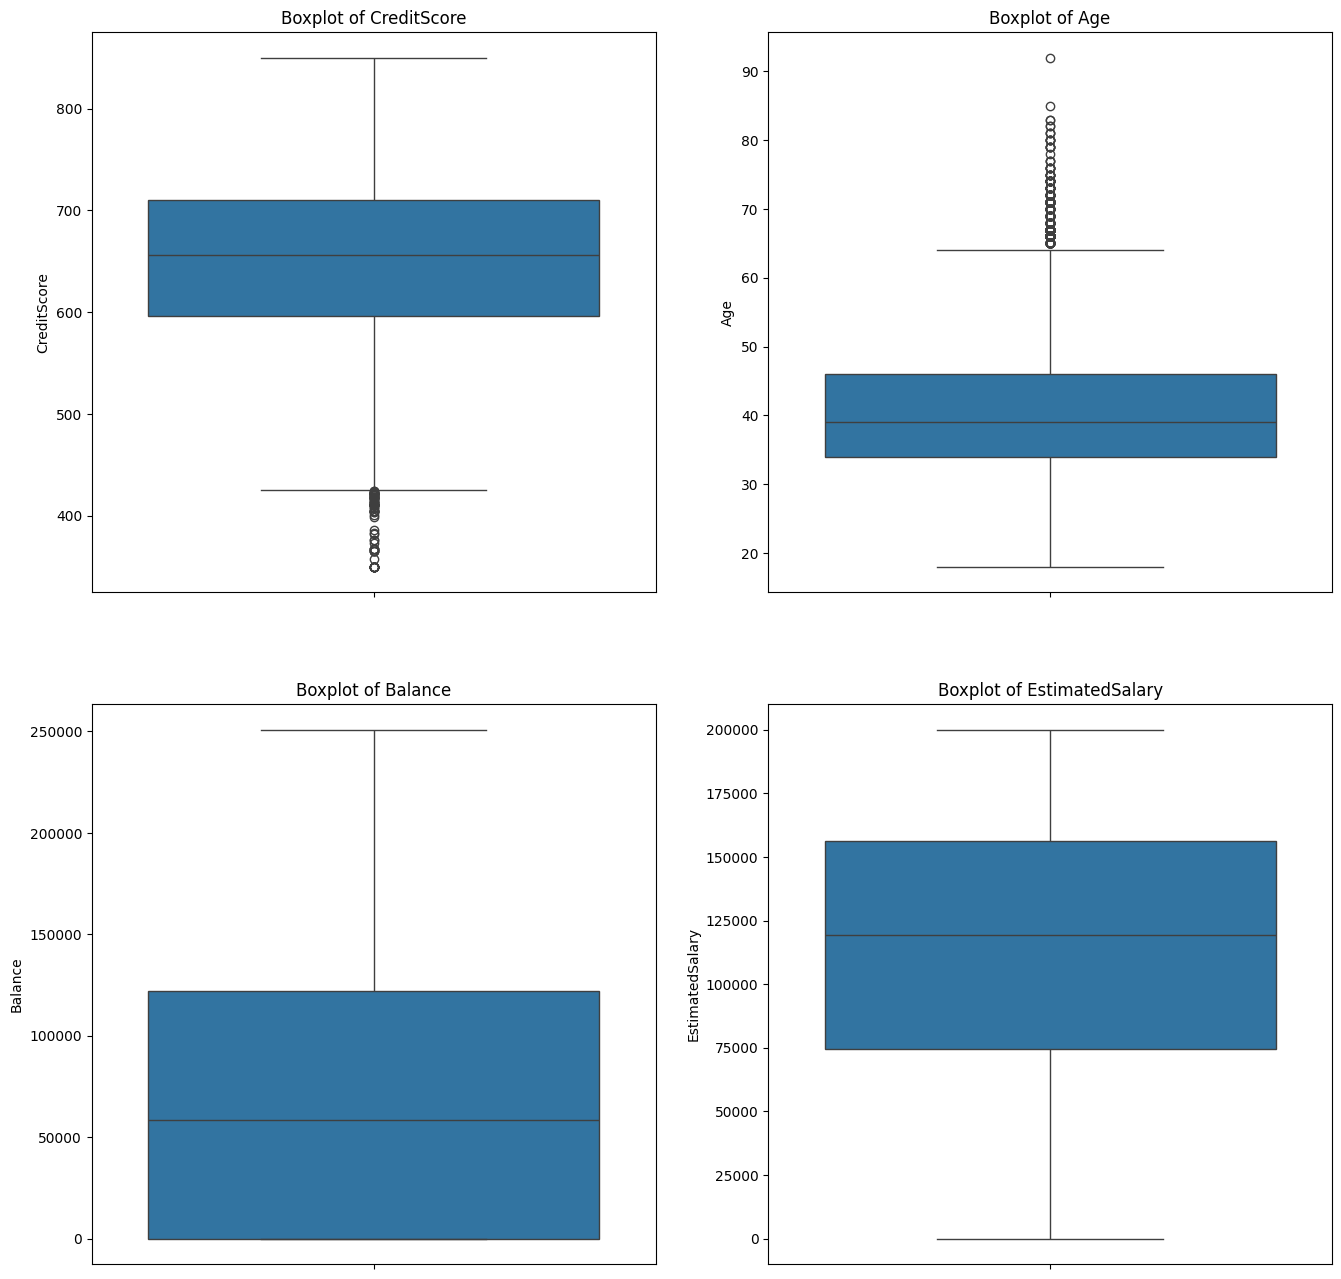

In [29]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.boxplot(df[quants[i]],ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

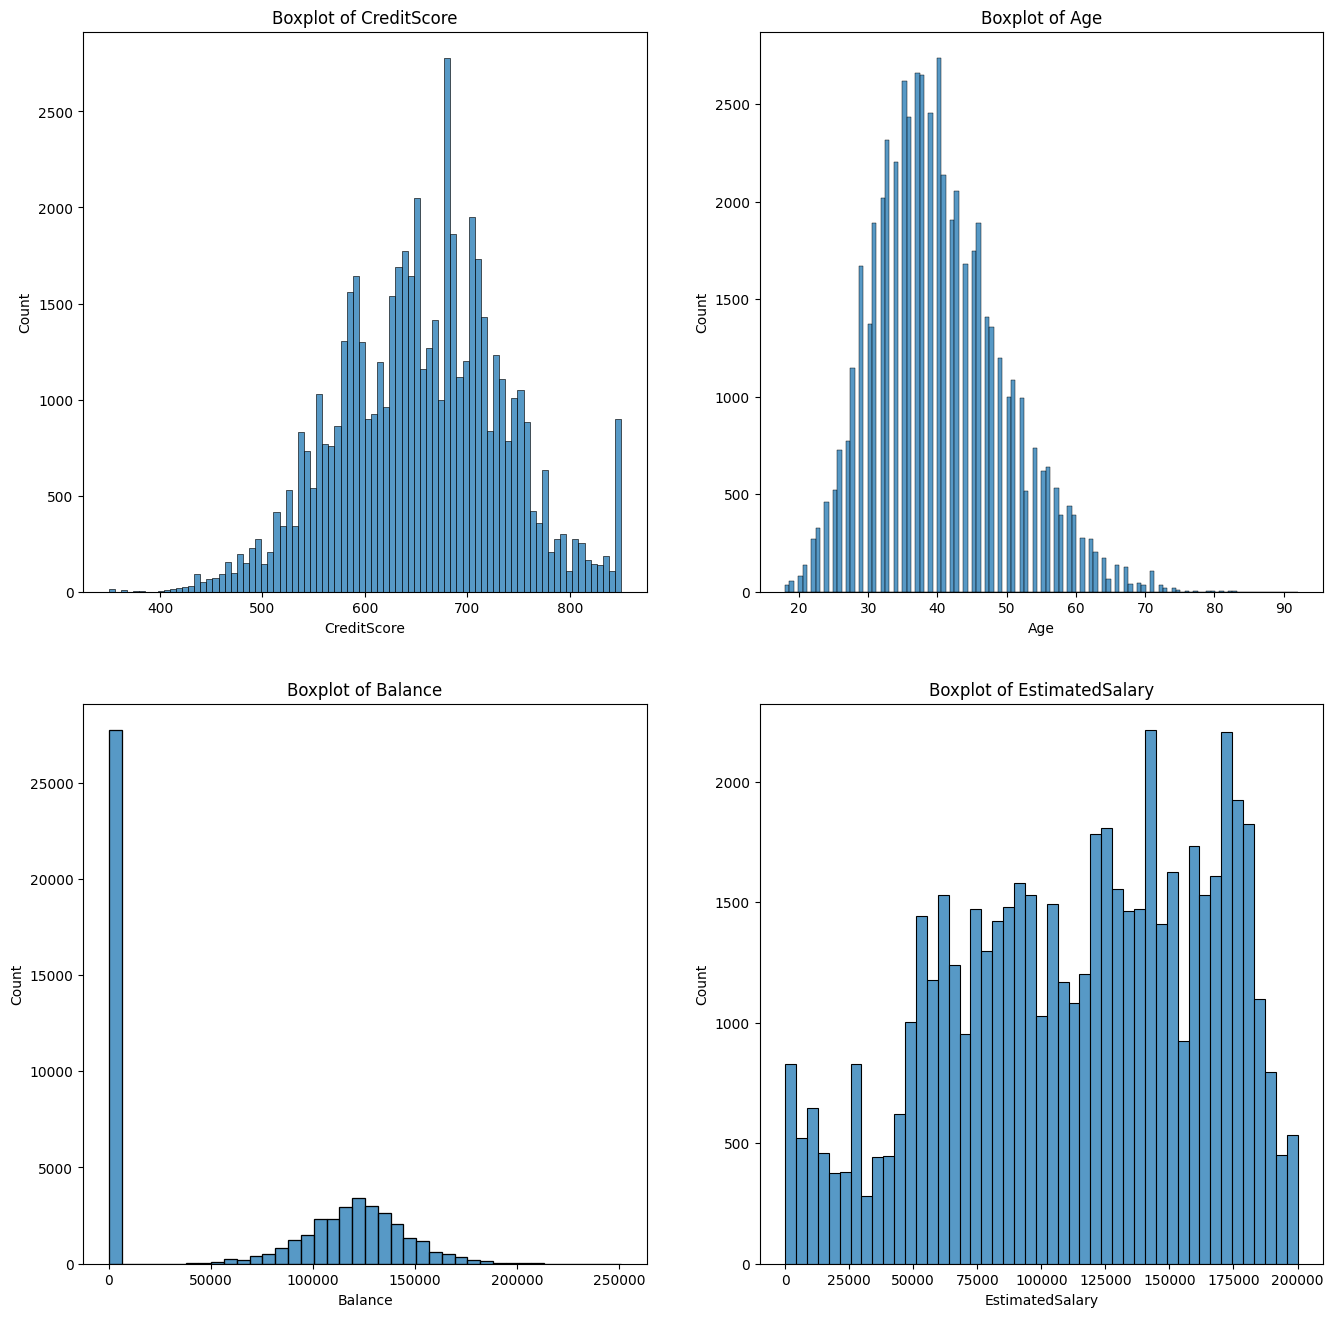

In [30]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.histplot(df[quants[i]],ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

In [31]:
for cat in cats:
    df[cat]=df[cat].astype('str')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  object 
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  object 
 7   HasCrCard        55873 non-null  object 
 8   IsActiveMember   55873 non-null  object 
 9   EstimatedSalary  55873 non-null  float64
 10  Exited           55873 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 5.1+ MB


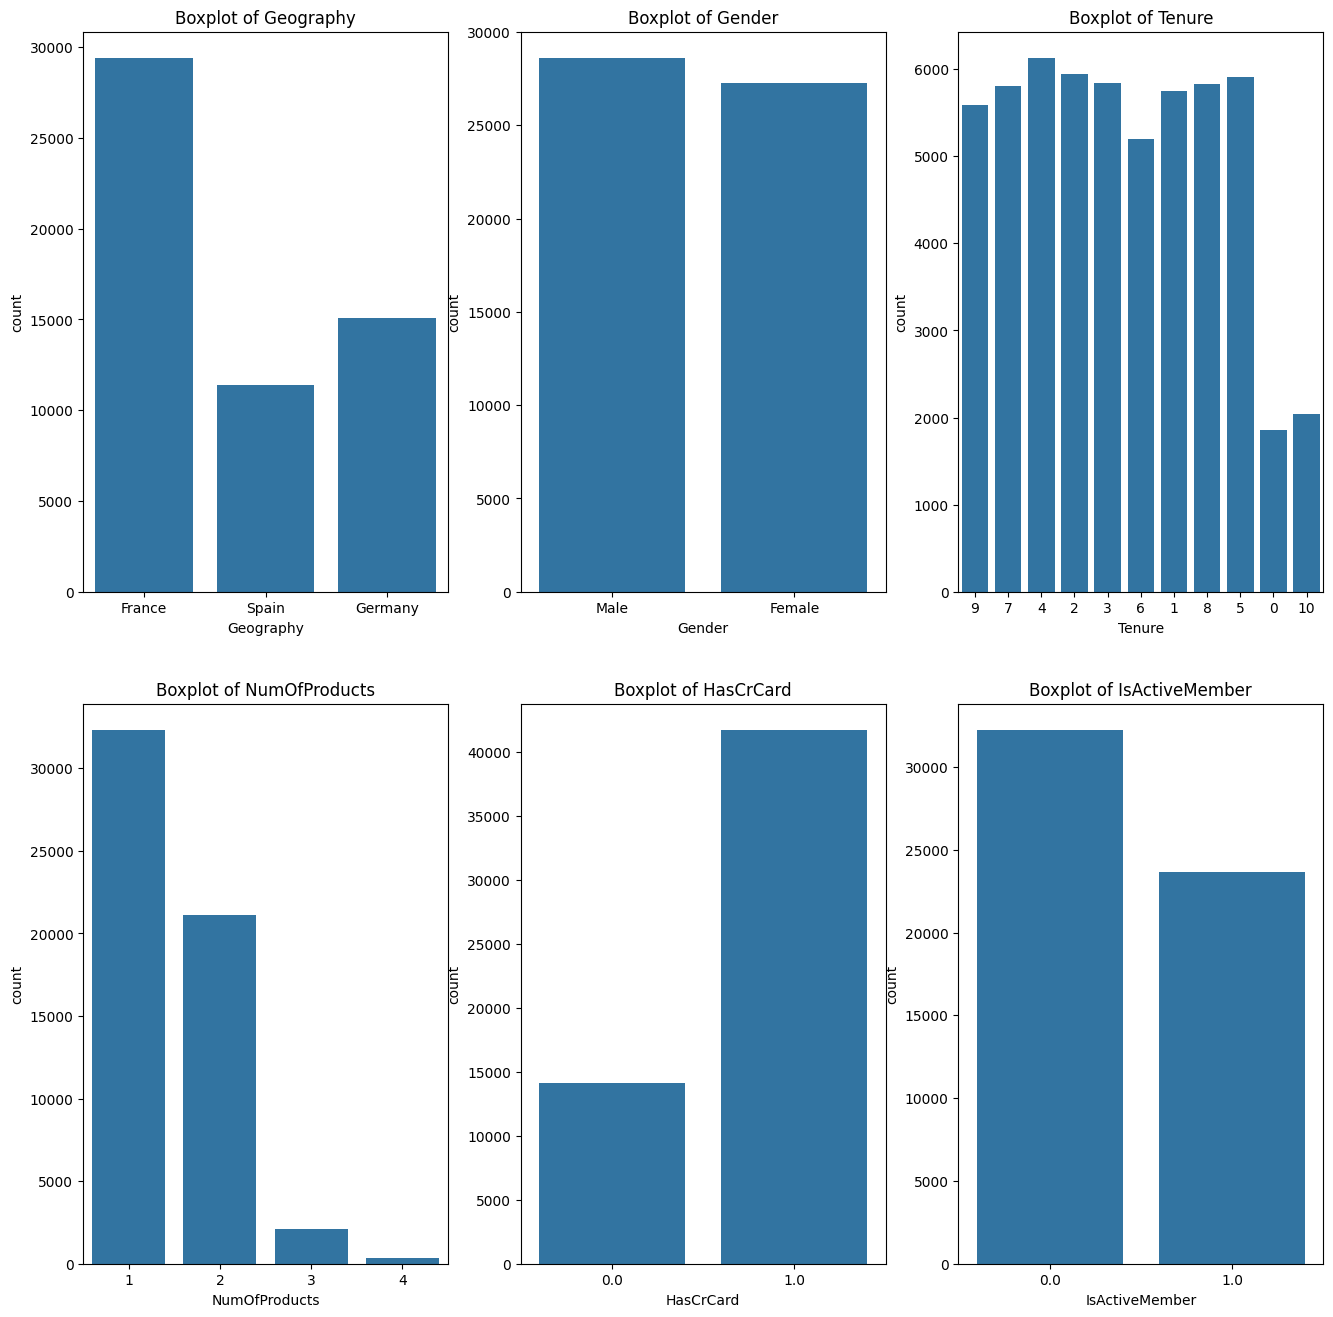

In [33]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.countplot(x=cats[i],data=df,ax=ax)
    ax.set_title(f"Boxplot of {(cats[i])}")
    
    
plt.show()

## Bivariate Anlysis Between target and the other variables

In [34]:
df.Exited=df.Exited.astype(str)

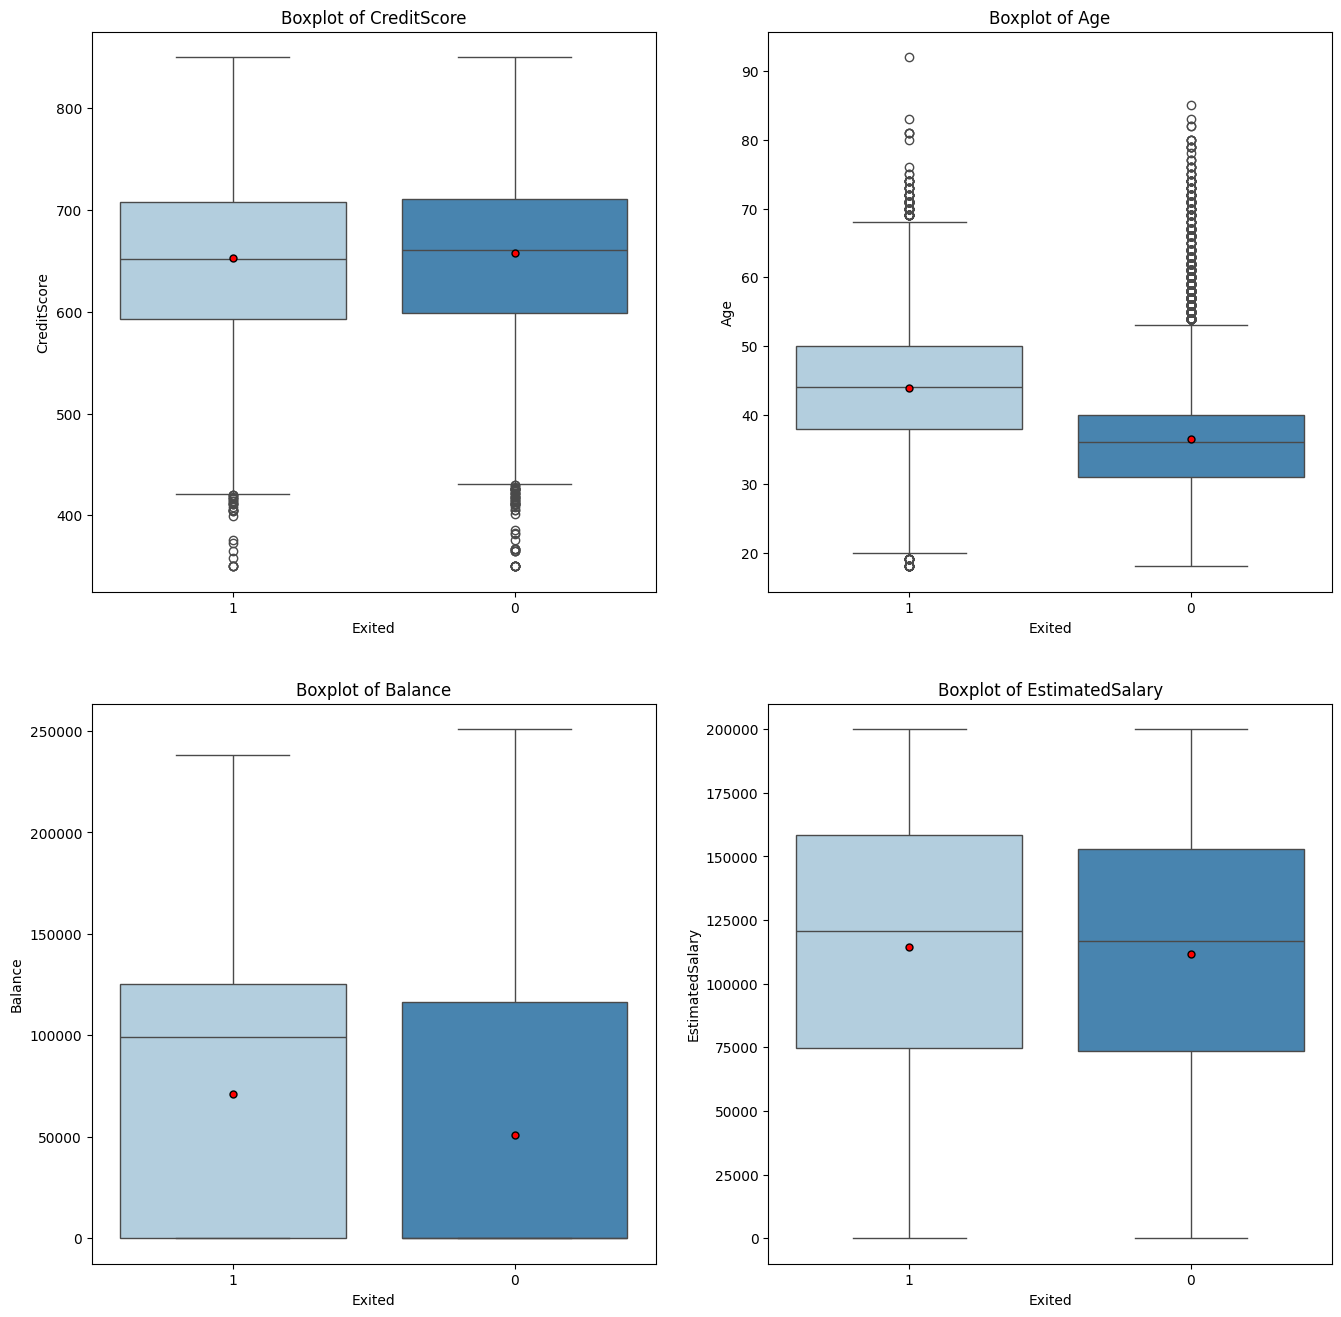

In [35]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.boxplot(x='Exited',
                y=quants[i],
                data=df,
                showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": 'red',"markeredgecolor": "black","markersize": "5"},
                palette="Blues",
                ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

### Cats and Target

In [36]:
cats_2=cats

In [37]:
def disp_plots(cats_2):
    combos=[[a,b] for idx, a in enumerate(cats_2) for b in tl[idx + 1:]]
    for combo in combos:
        sns.countplot(data=df,x=combo[0],hue=combo[1])
        plt.show()

In [38]:
cats_2=['Geography','Gender','Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']

## Categoricals and Target

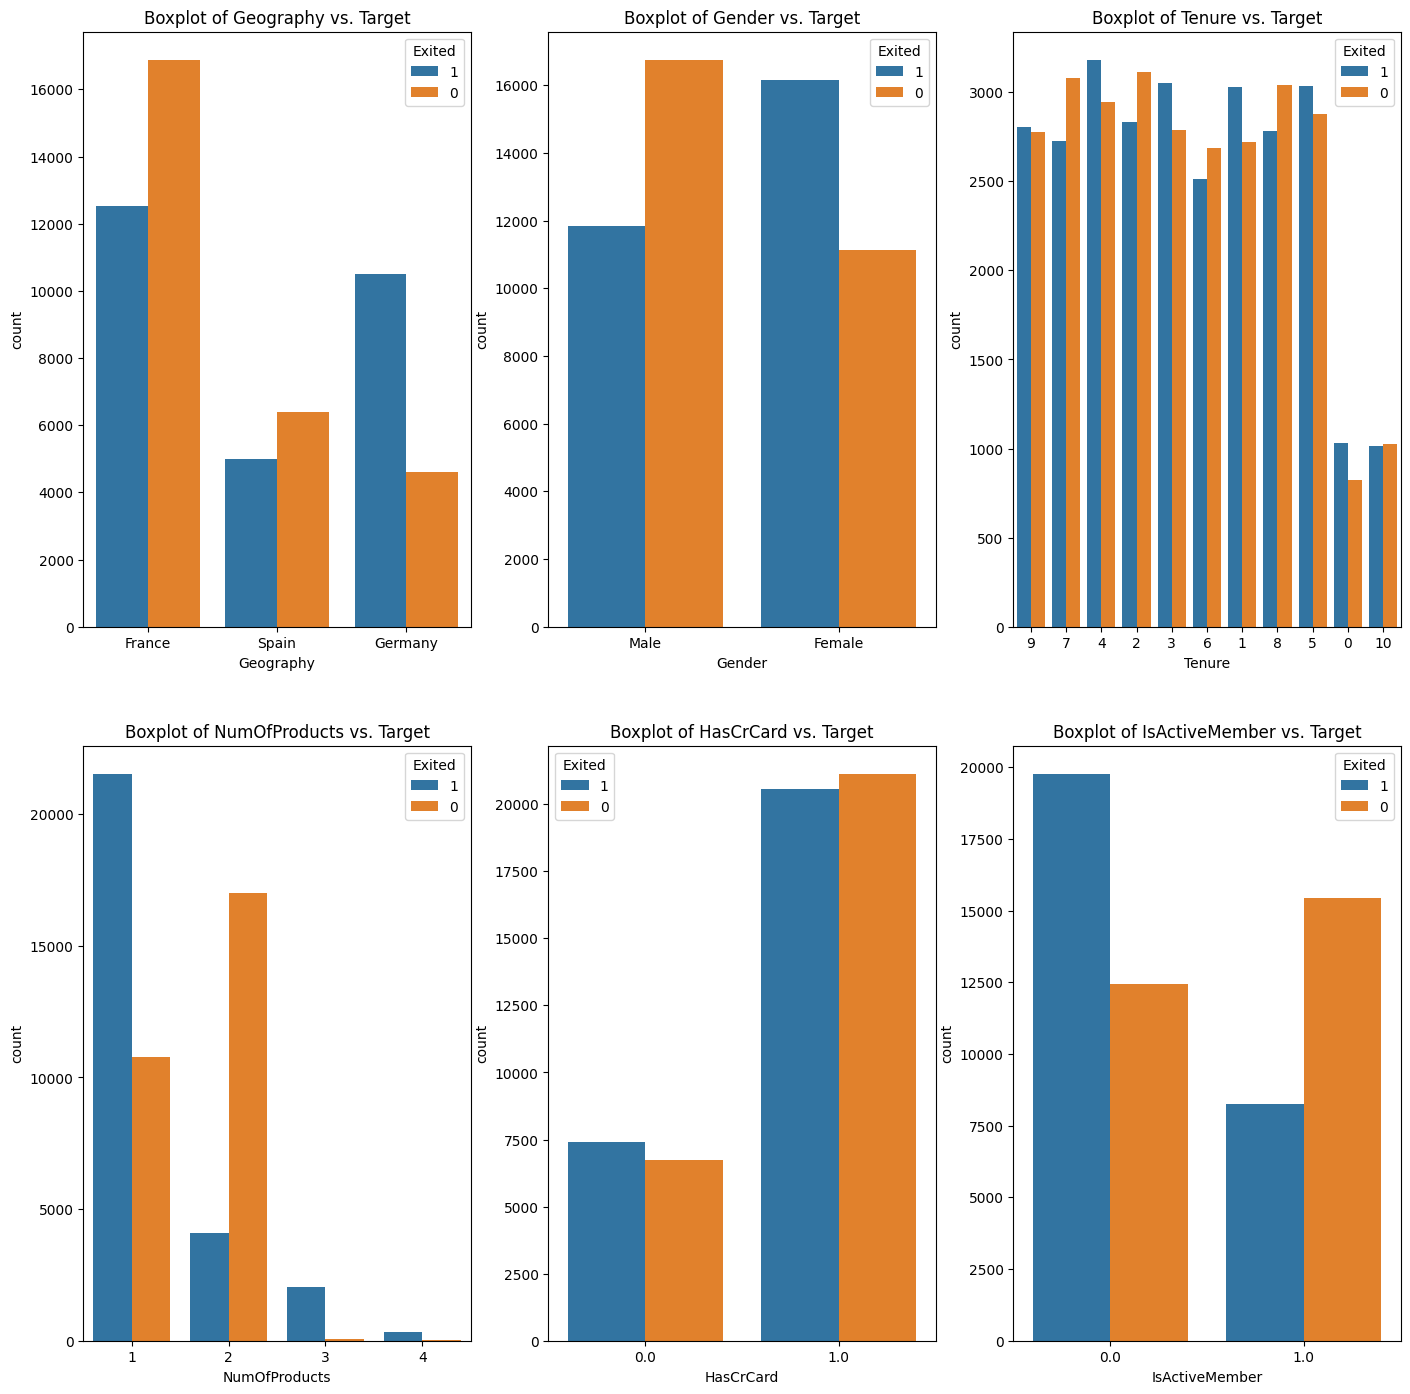

In [39]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(17,17))

for i,ax in enumerate(axes.ravel()):
    sns.countplot(data=df,x=cats_2[i],hue="Exited",ax=ax)
    ax.set_title(f"Boxplot of {(cats_2[i])} vs. Target")

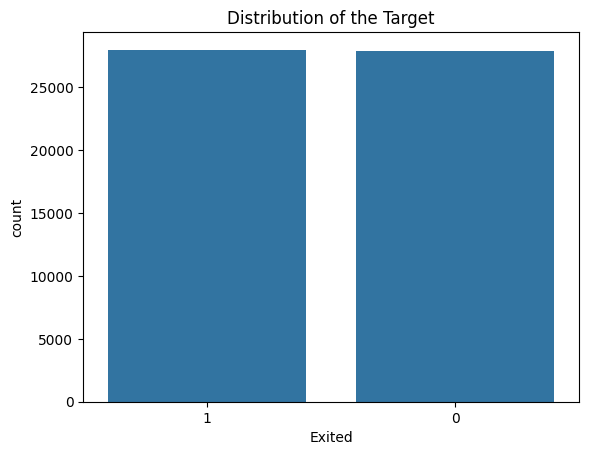

In [40]:
sns.countplot(data=df,x="Exited")
plt.title("Distribution of the Target")
plt.show()

## Preprocessing before

In [41]:
def cols_into_int(dt):
    dt['Tenure']=dt['Tenure'].astype(float)
    dt['NumOfProducts']=dt['NumOfProducts'].astype(float)
    dt['HasCrCard']=dt['HasCrCard'].astype(float)
    dt['IsActiveMember']=dt['IsActiveMember'].astype(float)
    dt['Exited']=dt['Exited'].astype(float)
    return dt

x_train=cols_into_int(x_train)

In [42]:
df=x_train
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  float64
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  float64
 7   HasCrCard        55873 non-null  float64
 8   IsActiveMember   55873 non-null  float64
 9   EstimatedSalary  55873 non-null  float64
 10  Exited           55873 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.1+ MB


In [43]:
y=df['Exited']
x=df.drop(columns='Exited',axis=1)

In [44]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
23351,609,France,Male,30.0,9.0,110829.52,1.0,0.0,0.0,24938.84
163786,579,Spain,Female,46.0,7.0,99167.54,1.0,0.0,1.0,91858.77
39466,679,France,Male,32.0,4.0,0.00,2.0,1.0,1.0,127569.80
151604,770,France,Female,36.0,2.0,0.00,2.0,0.0,1.0,180326.83
104566,684,Germany,Male,39.0,2.0,116084.02,1.0,1.0,0.0,166487.31


### Initial Variable Importance Checker

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  float64
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  float64
 7   HasCrCard        55873 non-null  float64
 8   IsActiveMember   55873 non-null  float64
 9   EstimatedSalary  55873 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ MB


In [46]:
#Channging to fit new models
x=pd.get_dummies(x)
x_test_2=pd.get_dummies(x_test)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        55873 non-null  int64  
 1   Age                55873 non-null  float64
 2   Tenure             55873 non-null  float64
 3   Balance            55873 non-null  float64
 4   NumOfProducts      55873 non-null  float64
 5   HasCrCard          55873 non-null  float64
 6   IsActiveMember     55873 non-null  float64
 7   EstimatedSalary    55873 non-null  float64
 8   Geography_France   55873 non-null  bool   
 9   Geography_Germany  55873 non-null  bool   
 10  Geography_Spain    55873 non-null  bool   
 11  Gender_Female      55873 non-null  bool   
 12  Gender_Male        55873 non-null  bool   
dtypes: bool(5), float64(7), int64(1)
memory usage: 4.1 MB


In [48]:
x_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13969 entries, 146947 to 91980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        13969 non-null  int64  
 1   Age                13969 non-null  float64
 2   Tenure             13969 non-null  int64  
 3   Balance            13969 non-null  float64
 4   NumOfProducts      13969 non-null  int64  
 5   HasCrCard          13969 non-null  float64
 6   IsActiveMember     13969 non-null  float64
 7   EstimatedSalary    13969 non-null  float64
 8   Geography_France   13969 non-null  bool   
 9   Geography_Germany  13969 non-null  bool   
 10  Geography_Spain    13969 non-null  bool   
 11  Gender_Female      13969 non-null  bool   
 12  Gender_Male        13969 non-null  bool   
dtypes: bool(5), float64(5), int64(3)
memory usage: 1.0 MB


In [49]:
# Modelling
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

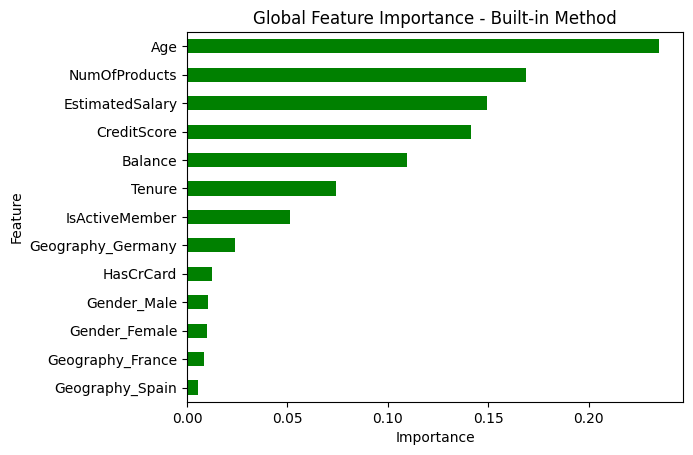

In [50]:
rc = RandomForestClassifier(n_estimators=100, random_state=42)
rc.fit(x, y)

global_importances = pd.Series(rc.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# Advanced Modelling

## Encoding Caegoricals

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  float64
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  float64
 7   HasCrCard        55873 non-null  float64
 8   IsActiveMember   55873 non-null  float64
 9   EstimatedSalary  55873 non-null  float64
 10  Exited           55873 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.1+ MB


In [52]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [53]:
quants=['CreditScore','Age','Balance','EstimatedSalary']
nominal=['Geography','Gender']
ordinal=['Tenure','NumOfProducts']
others=['HasCrCard','IsActiveMember']

df = x_train

In [54]:
list(np.arange(0,11,dtype=float))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [55]:
numeric_transformer = StandardScaler()

encoder_tenure=OrdinalEncoder(categories=[list(np.arange(0,11,dtype=float))])
encoder_numofproducts=OrdinalEncoder(categories=[list(np.arange(1,5,dtype=float))])
nominal_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,quants),
    ('ten',encoder_tenure,['Tenure']),
    ('prods',encoder_numofproducts,['NumOfProducts']),
    ('nomi',nominal_transformer,nominal)
])

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=100)

log_reg_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',logreg)
])

log_reg_model=log_reg_pipeline.fit(x_train,y_train)

Text(0.5, 427.9555555555555, 'Predicted label')

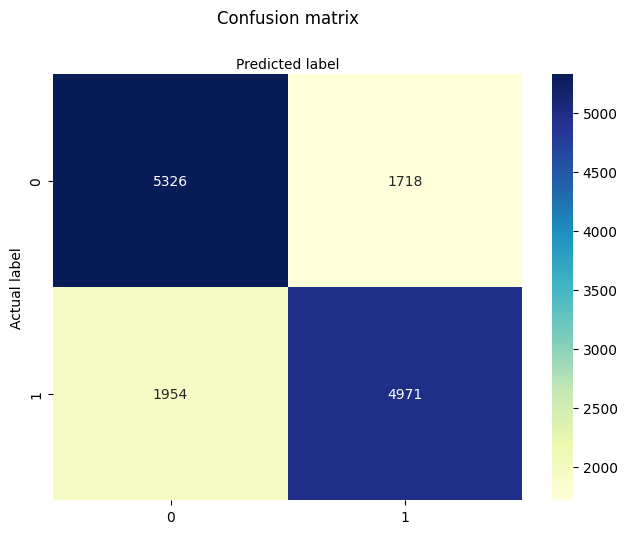

In [57]:
from sklearn import metrics

y_preds_log_reg = log_reg_model.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_log_reg)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_log_reg=f1_score(y_test,y_preds_log_reg)
accuracy_log_reg=accuracy_score(y_test, y_preds_log_reg, normalize=True)

print(f"Accuracy is, {accuracy_log_reg}")
print(f"F1 score is, {f1_log_reg}")


Accuracy is, 0.737132221347269
F1 score is, 0.7302776553547818


In [59]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7),
      "penalty":["l1","l2"],
      "solver":["liblinear","saga"]
      }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs = -1)
logreg_cv.fit(x,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7473735685369414


In [60]:
logreg_best = LogisticRegression(random_state=100, C=1000.0, penalty='l1', solver='liblinear')

log_reg_best_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',logreg_best)
])

log_reg_best_model=log_reg_best_pipeline.fit(x_train,y_train)

Accuracy is, 0.7370606342615792
F1 score is, 0.7302240176276166


Text(0.5, 427.9555555555555, 'Predicted label')

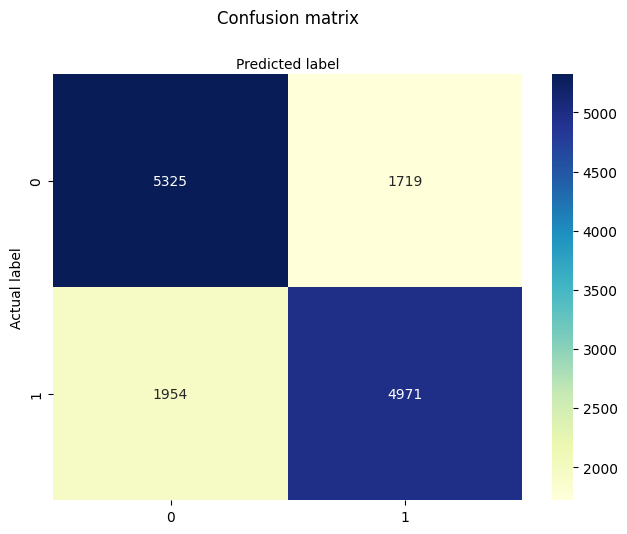

In [61]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_preds_log_reg_best = log_reg_best_model.predict(x_test)

f1_log_reg=f1_score(y_test,y_preds_log_reg_best)
accuracy_log_reg=accuracy_score(y_test, y_preds_log_reg_best, normalize=True)

print(f"Accuracy is, {accuracy_log_reg}")
print(f"F1 score is, {f1_log_reg}")


cnf_matrix = metrics.confusion_matrix(y_test, y_preds_log_reg_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=100)

decision_tree_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',tree)
])

decision_tree_model=decision_tree_pipeline.fit(x_train,y_train)

Accuracy is, 0.7081394516429236
F1 score is, 0.7068382828791256


Text(0.5, 427.9555555555555, 'Predicted label')

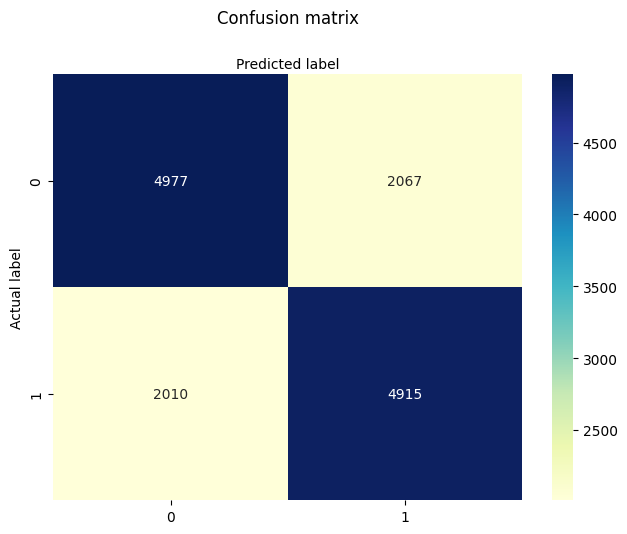

In [63]:
y_preds_tree_model = decision_tree_pipeline.predict(x_test)

f1=f1_score(y_test,y_preds_tree_model)
accuracy=accuracy_score(y_test, y_preds_tree_model, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_model)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [64]:
#Parameter Optimizaion
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'criterion' :['gini', 'entropy'],
             }

tree_class = DecisionTreeClassifier(random_state=100)

tree_grid= GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=10, verbose=True,n_jobs=-1)

tree_grid.fit(x, y_train)


print("tuned hpyerparameters :(best parameters) ",tree_grid.best_params_)
print("accuracy :",tree_grid.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt'}
accuracy : 0.7654321810563663


Accuracy is, 0.7081394516429236
F1 score is, 0.7068382828791256


Text(0.5, 427.9555555555555, 'Predicted label')

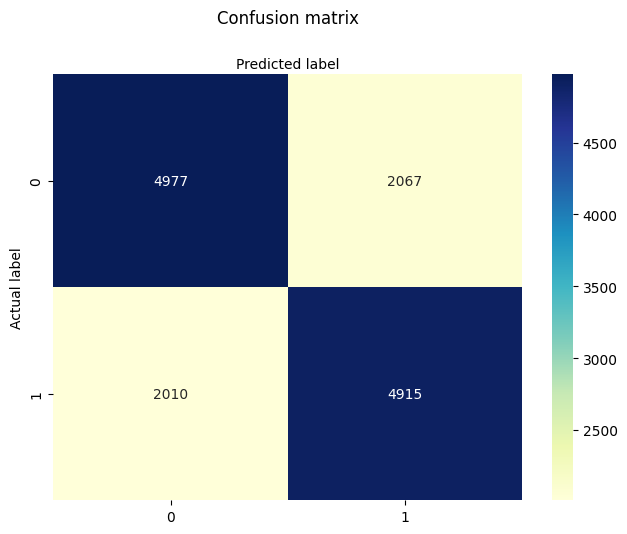

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')

decision_tree_pipeline_best=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',tree_best)
])

decision_tree_model_best=decision_tree_pipeline_best.fit(x_train,y_train)


y_preds_tree_model_best = decision_tree_model_best.predict(x_test)

f1=f1_score(y_test,y_preds_tree_model)
accuracy=accuracy_score(y_test, y_preds_tree_model, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_model)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

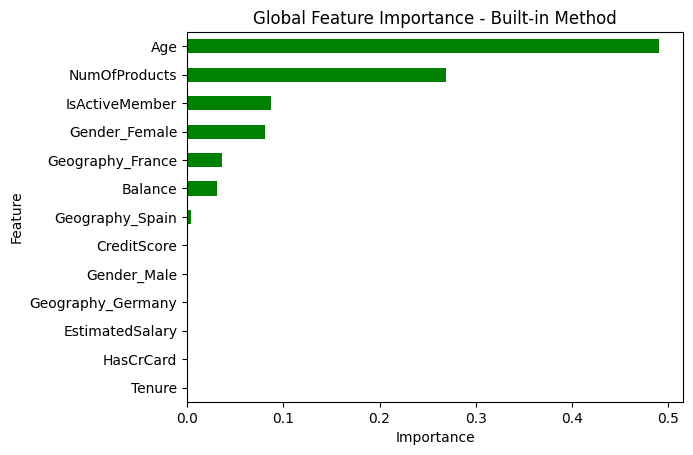

In [66]:
tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')
tree_best.fit(x,y_train)


global_importances = pd.Series(tree_best.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

Remove unwanted variables and refit the model

In [67]:
def drop_cols(data_table):
    data_table = data_table.drop(columns=['Tenure','HasCrCard','EstimatedSalary','Geography_Germany','Gender_Male','CreditScore','Geography_Spain'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(x_test_2)


Accuracy is, 0.7790106664757678
F1 score is, 0.7737632832539392


Text(0.5, 427.9555555555555, 'Predicted label')

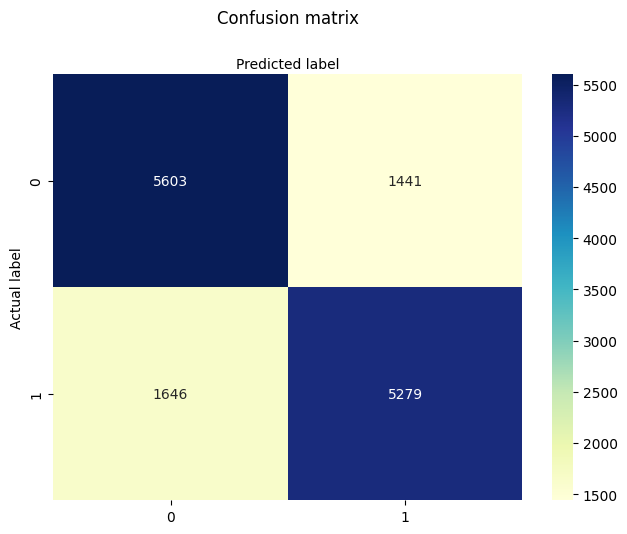

In [68]:
tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')
tree_best.fit(x_change,y_train)

y_preds_tree_model_best = tree_best.predict(x_change_test)

f1=f1_score(y_test,y_preds_tree_model_best)
accuracy=accuracy_score(y_test, y_preds_tree_model_best, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_model_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy is, 0.7895339680721598
F1 score is, 0.7842043452730476


Text(0.5, 427.9555555555555, 'Predicted label')

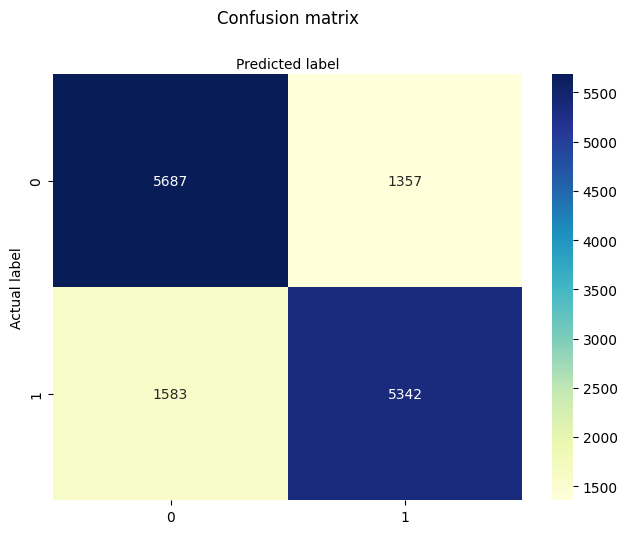

In [69]:
#Only include 3 variables Number of Products, 'IsActiveMember' and Age
def drop_cols(data_table):
    data_table = data_table.drop(columns=['Tenure','HasCrCard','EstimatedSalary','Geography_Germany','Gender_Male','CreditScore','Geography_Spain','Gender_Female','Geography_France'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(x_test_2)

tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')
tree_best.fit(x_change,y_train)

y_preds_tree_model_best = tree_best.predict(x_change_test)

f1=f1_score(y_test,y_preds_tree_model_best)
accuracy=accuracy_score(y_test, y_preds_tree_model_best, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_model_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy is, 0.7582504116257427
F1 score is, 0.7382779198635976


Text(0.5, 427.9555555555555, 'Predicted label')

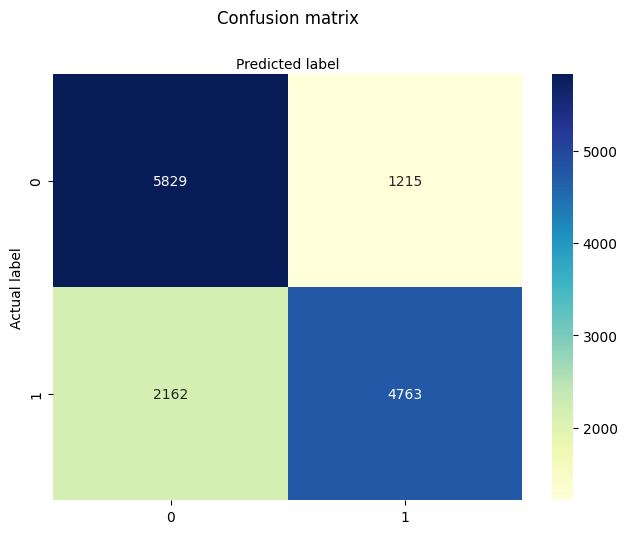

In [70]:
#Only include 2 variables Number of Products and Age
def drop_cols(data_table):
    data_table = data_table.drop(columns=['Tenure','HasCrCard','EstimatedSalary','Geography_Germany','Gender_Male','CreditScore','Geography_Spain','Gender_Female','Geography_France','IsActiveMember'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(x_test_2)

tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')
tree_best.fit(x_change,y_train)

y_preds_tree_model_best = tree_best.predict(x_change_test)

f1=f1_score(y_test,y_preds_tree_model_best)
accuracy=accuracy_score(y_test, y_preds_tree_model_best, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_model_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Random Forrest Classification

In [71]:
from sklearn.ensemble import RandomForestClassifier

r_forrest = RandomForestClassifier(random_state=100)
r_forrest_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',r_forrest)
])

r_forrest_model=r_forrest_pipeline.fit(x_train,y_train)

Accuracy is, 0.7800128856754242
F1 score is, 0.778490593238665


Text(0.5, 427.9555555555555, 'Predicted label')

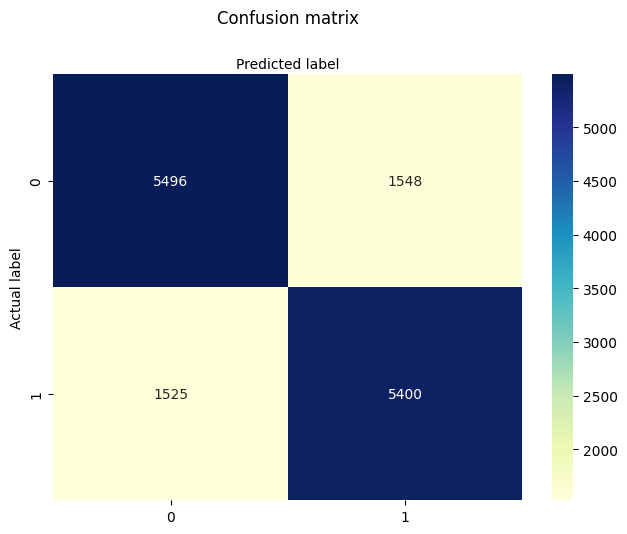

In [72]:
y_preds_tree_forrest = r_forrest_model.predict(x_test)

f1=f1_score(y_test,y_preds_tree_forrest)
accuracy=accuracy_score(y_test, y_preds_tree_forrest, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_forrest)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
# Number of trees in random forest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=100)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

Accuracy is, 0.7901066647576778
F1 score is, 0.7899111493264546


Text(0.5, 427.9555555555555, 'Predicted label')

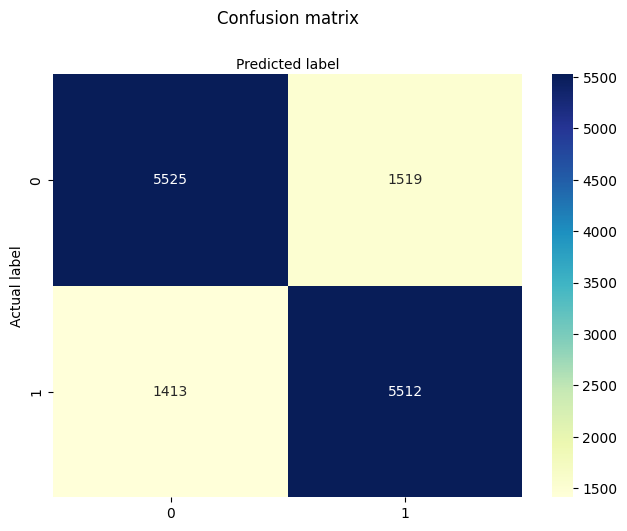

In [76]:
r_forrest = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)
r_forrest_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',r_forrest)
])

r_forrest_model=r_forrest_pipeline.fit(x_train,y_train)


y_preds_tree_forrest = r_forrest_model.predict(x_test)

f1=f1_score(y_test,y_preds_tree_forrest)
accuracy=accuracy_score(y_test, y_preds_tree_forrest, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_tree_forrest)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

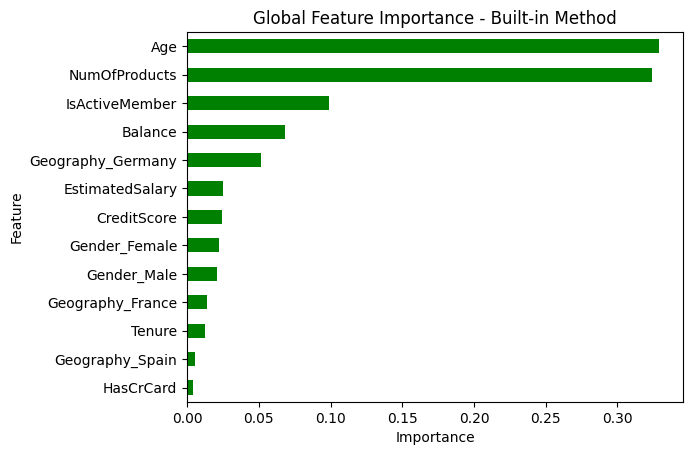

In [77]:
#Feature Importance
r_forrest_best = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)
r_forrest_best.fit(x,y_train)


global_importances = pd.Series(r_forrest_best.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

Accuracy is, 0.8076455007516644
F1 score is, 0.8054731050459711


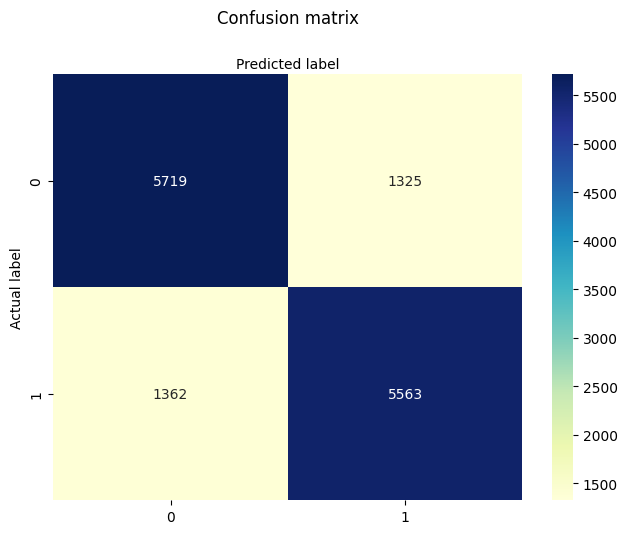

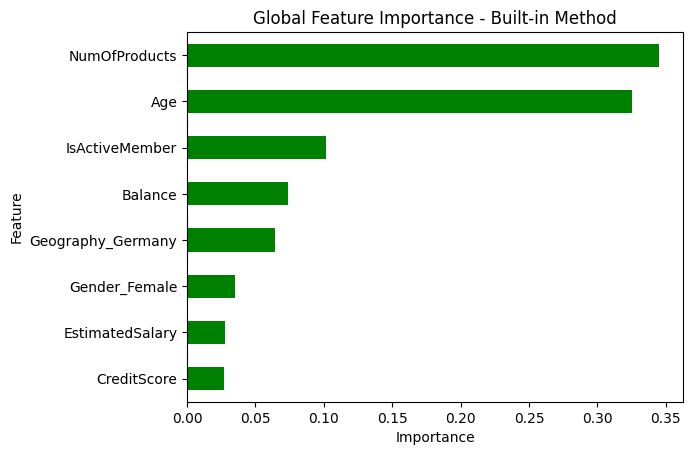

In [78]:
def drop_cols(data_table):
    data_table = data_table.drop(columns=['Tenure','HasCrCard','Geography_Spain','Gender_Male','Geography_France'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(x_test_2)

r_forrest_best = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)


r_forrest_best.fit(x_change,y_train)

y_preds_r_forrest_best = r_forrest_best.predict(x_change_test)

f1=f1_score(y_test,y_preds_r_forrest_best)
accuracy=accuracy_score(y_test, y_preds_r_forrest_best, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_r_forrest_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

global_importances = pd.Series(r_forrest_best.feature_importances_, index=x_change.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
plt.show()

## XGB Classifier

In [79]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [80]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  float64
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  float64
 7   HasCrCard        55873 non-null  float64
 8   IsActiveMember   55873 non-null  float64
 9   EstimatedSalary  55873 non-null  float64
 10  Exited           55873 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.1+ MB


In [81]:
x_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13969 entries, 146947 to 91980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        13969 non-null  int64  
 1   Age                13969 non-null  float64
 2   Tenure             13969 non-null  int64  
 3   Balance            13969 non-null  float64
 4   NumOfProducts      13969 non-null  int64  
 5   HasCrCard          13969 non-null  float64
 6   IsActiveMember     13969 non-null  float64
 7   EstimatedSalary    13969 non-null  float64
 8   Geography_France   13969 non-null  bool   
 9   Geography_Germany  13969 non-null  bool   
 10  Geography_Spain    13969 non-null  bool   
 11  Gender_Female      13969 non-null  bool   
 12  Gender_Male        13969 non-null  bool   
dtypes: bool(5), float64(5), int64(3)
memory usage: 1.0 MB


In [82]:
params = dict()

params['device']='cuda'

In [83]:
xgb_classifier = xgb.XGBClassifier(random_state=100)

xgb_pipline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',xgb_classifier)
]
)

xgb_model = xgb_pipline.fit(x_train,y_train)

Accuracy is, 0.7905361872718162
F1 score is, 0.789253817343705


Text(0.5, 427.9555555555555, 'Predicted label')

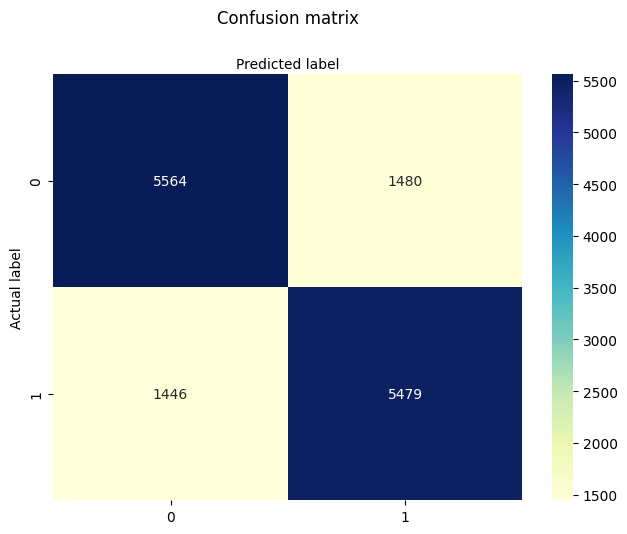

In [84]:
y_preds_xgb = xgb_model.predict(x_test)

f1=f1_score(y_test,y_preds_xgb)
accuracy=accuracy_score(y_test, y_preds_xgb, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_xgb)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05,0.1,0.15,0.2],
        'n_estimators' : [500,600,700]
        }

xgb_classifier=xgb.XGBClassifier(nthread=1)

In [86]:
import warnings

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(xgb_classifier,
                                   param_distributions=params,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=10,
                                   verbose=3,
                                   random_state=100 )

# Here we go
# timing starts from this point for "start_time" variable
random_search.fit(x, y_train)
# print results
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}


Accuracy is, 0.7936860190421648
F1 score is, 0.7925723333813157


Text(0.5, 427.9555555555555, 'Predicted label')

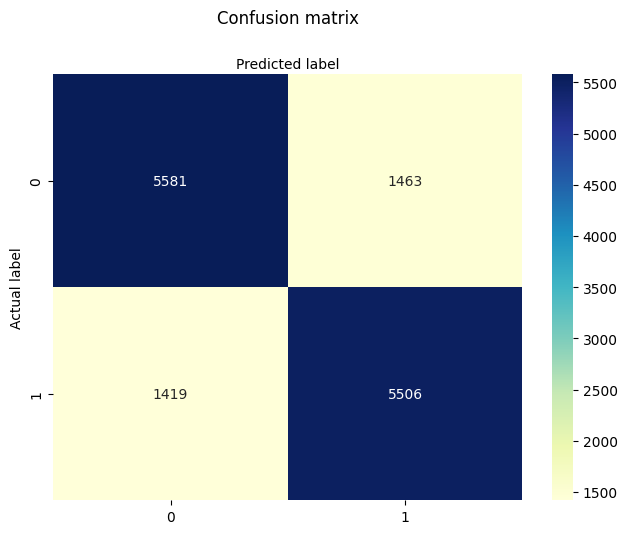

In [87]:
xgb_classifier = xgb.XGBClassifier(
    random_state=100,
    subsample=1.0, 
    n_estimators= 600, 
    min_child_weight= 1, 
    max_depth= 5, 
    learning_rate= 0.05, 
    gamma= 0.5, 
    colsample_bytree= 0.8
    )

xgb_pipline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',xgb_classifier)
]
)

xgb_model = xgb_pipline.fit(x_train,y_train)

y_preds_xgb = xgb_model.predict(x_test)

f1=f1_score(y_test,y_preds_xgb)
accuracy=accuracy_score(y_test, y_preds_xgb, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_xgb)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

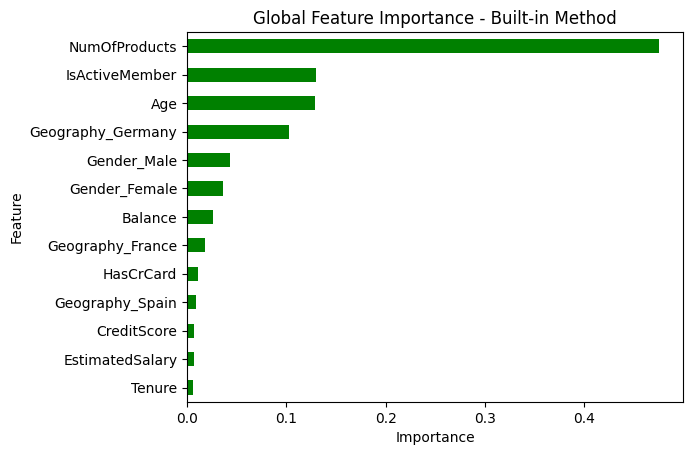

In [88]:
#Feature Importance
xgb_classifier = xgb.XGBClassifier(
    random_state=100,
    subsample=1.0, 
    n_estimators= 600, 
    min_child_weight= 1, 
    max_depth= 5, 
    learning_rate= 0.05, 
    gamma= 0.5, 
    colsample_bytree= 0.8
    )
xgb_classifier.fit(x,y_train)


global_importances = pd.Series(xgb_classifier.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [89]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

Accuracy is, 0.7904646001861264
F1 score is, 0.7832012443522702


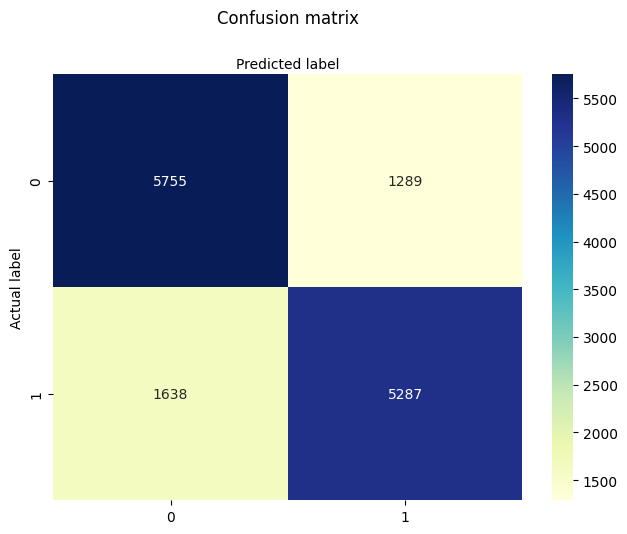

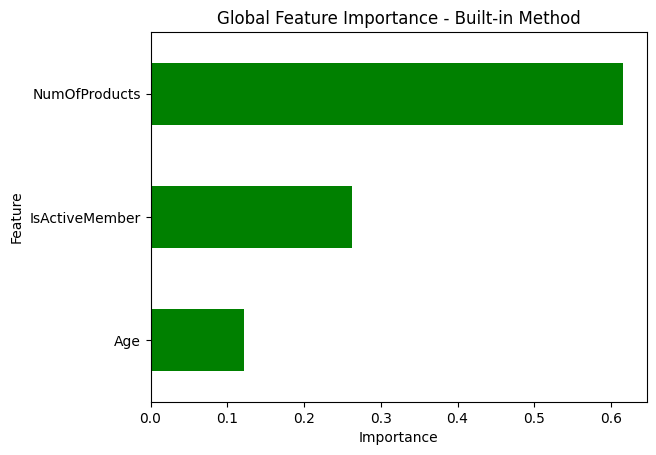

In [90]:
def drop_cols(data_table):
    data_table = data_table.drop(columns=['CreditScore', 'Tenure', 'Balance', 'HasCrCard',
       'EstimatedSalary', 'Geography_France',
       'Geography_Germany','Geography_Spain', 'Gender_Female', 'Gender_Male'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(x_test_2)

xgb_classifier = xgb.XGBClassifier(
    random_state=100,
    subsample=1.0, 
    n_estimators= 600, 
    min_child_weight= 1, 
    max_depth= 5, 
    learning_rate= 0.05, 
    gamma= 0.5, 
    colsample_bytree= 0.8
    )
xgb_classifier.fit(x_change,y_train)

y_preds_xgb_classifier_best = xgb_classifier.predict(x_change_test)

f1=f1_score(y_test,y_preds_xgb_classifier_best)
accuracy=accuracy_score(y_test, y_preds_xgb_classifier_best, normalize=True)

print(f"Accuracy is, {accuracy}")
print(f"F1 score is, {f1}")

cnf_matrix = metrics.confusion_matrix(y_test, y_preds_xgb_classifier_best)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

global_importances = pd.Series(xgb_classifier.feature_importances_, index=x_change.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
plt.show()

# Main Inference

In [91]:
main_test=pd.read_csv('test.csv',index_col='id')
main_test_2=pd.read_csv('test.csv')

main_test_2=main_test_2.drop(columns=main_test.columns)
main_test=main_test.drop(columns=['CustomerId','Surname'])

In [92]:
main_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [93]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110023 entries, 165034 to 275056
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.2+ MB


In [94]:
y_preds_log_reg_main = log_reg_best_model.predict(main_test)
main_test_2['Exited']=y_preds_log_reg_main
main_test_2.to_csv("Submission_1.csv",index=False)

In [95]:
class columnTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.loc[:,self.columns]

    def fit(self, X, y=None):
        return self

In [96]:
main_test.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [97]:
#Remove all unnecessary columns and only leave NumberOfProducts, IsActiveMember and Age

tree_best=DecisionTreeClassifier(random_state=100, ccp_alpha=0.001, criterion='entropy', max_depth=14, max_features='sqrt')
decision_tree_pipeline=Pipeline(steps=[
    ('preprocessor',columnTransformer(['Age','NumOfProducts','IsActiveMember'])),
    ('regressor',tree_best)
])

decision_tree_model=decision_tree_pipeline.fit(x_train,y_train)


y_preds_tree_main = decision_tree_model_best.predict(main_test)
main_test_2['Exited']=y_preds_tree_main
main_test_2.to_csv("Submission_3.csv",index=False)

In [98]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [99]:
main_test_change=pd.get_dummies(main_test)

In [100]:
main_test.shape

(110023, 10)

In [101]:
#Remove all unnecessary columns and only leave NumberOfProducts, IsActiveMember and Age

def drop_cols(data_table):
    data_table = data_table.drop(columns=['Tenure','HasCrCard','Geography_Spain','Gender_Male','Geography_France'],axis=1)
    return data_table

x_change = drop_cols(x)
x_change_test=drop_cols(main_test_change)

r_forrest_best = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)


r_forrest_best.fit(x_change,y_train)

y_preds_forrest_main = r_forrest_best.predict(x_change_test)
main_test_2['Exited']=y_preds_forrest_main
main_test_2.to_csv("Submission_4.csv",index=False)

In [102]:
r_forrest_best = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)


r_forrest_best.fit(x_change,y_train)

y_preds_forrest_main = r_forrest_best.predict(x_change_test)
main_test_2['Exited']=y_preds_forrest_main
main_test_2.to_csv("Submission_4.csv",index=False)

In [103]:
x_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        55873 non-null  int64  
 1   Age                55873 non-null  float64
 2   Balance            55873 non-null  float64
 3   NumOfProducts      55873 non-null  float64
 4   IsActiveMember     55873 non-null  float64
 5   EstimatedSalary    55873 non-null  float64
 6   Geography_Germany  55873 non-null  bool   
 7   Gender_Female      55873 non-null  bool   
dtypes: bool(2), float64(5), int64(1)
memory usage: 3.1 MB


In [104]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
23351,609,France,Male,30.0,9.0,110829.52,1.0,0.0,0.0,24938.84,1.0
163786,579,Spain,Female,46.0,7.0,99167.54,1.0,0.0,1.0,91858.77,0.0
39466,679,France,Male,32.0,4.0,0.00,2.0,1.0,1.0,127569.80,0.0
151604,770,France,Female,36.0,2.0,0.00,2.0,0.0,1.0,180326.83,0.0
104566,684,Germany,Male,39.0,2.0,116084.02,1.0,1.0,0.0,166487.31,1.0
...,...,...,...,...,...,...,...,...,...,...,...
67869,493,France,Female,46.0,3.0,0.00,1.0,1.0,0.0,176570.28,1.0
30624,850,Germany,Male,33.0,8.0,108698.97,2.0,1.0,1.0,157959.34,0.0
74989,705,France,Male,40.0,5.0,0.00,2.0,1.0,0.0,91562.11,0.0


In [107]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      55873 non-null  int64  
 1   Geography        55873 non-null  object 
 2   Gender           55873 non-null  object 
 3   Age              55873 non-null  float64
 4   Tenure           55873 non-null  float64
 5   Balance          55873 non-null  float64
 6   NumOfProducts    55873 non-null  float64
 7   HasCrCard        55873 non-null  float64
 8   IsActiveMember   55873 non-null  float64
 9   EstimatedSalary  55873 non-null  float64
 10  Exited           55873 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.1+ MB


In [108]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55873 entries, 23351 to 67267
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        55873 non-null  int64  
 1   Age                55873 non-null  float64
 2   Tenure             55873 non-null  float64
 3   Balance            55873 non-null  float64
 4   NumOfProducts      55873 non-null  float64
 5   HasCrCard          55873 non-null  float64
 6   IsActiveMember     55873 non-null  float64
 7   EstimatedSalary    55873 non-null  float64
 8   Geography_France   55873 non-null  bool   
 9   Geography_Germany  55873 non-null  bool   
 10  Geography_Spain    55873 non-null  bool   
 11  Gender_Female      55873 non-null  bool   
 12  Gender_Male        55873 non-null  bool   
dtypes: bool(5), float64(7), int64(1)
memory usage: 4.1 MB


In [109]:
x_train=x_train.drop(columns='Exited',axis=1)
print(x_train.shape)
print(y_train.shape)

(55873, 10)
(55873,)


In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
set_config(transform_output = "pandas")


#Defining the Columns Dropper
#set_config(transform_output = "pandas") outputs the data as a dataframe instead of a numpy array
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
        
    def fit(self, X):
        return(self)
    
    def transform(self,X):
        return X.drop(self.columns_to_drop, axis=1)
    
#Defining the columns to encode
columns_to_encode = ['Gender','Geography']
columns_to_drop = ['remainder__Tenure','remainder__HasCrCard','onehot__Geography_Spain','onehot__Gender_Male','onehot__Geography_France']

#Defining the preprocessor pipeline
pipeline = Pipeline([
    ('onehot_encoder', ColumnTransformer(
        transformers=[
            ('onehot',OneHotEncoder(sparse_output=False),columns_to_encode)
        ],remainder='passthrough'
    )),
    ('column_dropper', DropColumnsTransformer(columns_to_drop))
])

transformed_data = pipeline.fit_transform(X)
transformed_data

,onehot__Gender_Female,onehot__Geography_Germany,remainder__CreditScore,remainder__Age,remainder__Balance,remainder__NumOfProducts,remainder__IsActiveMember,remainder__EstimatedSalary
id,,,,,,,,
5,0.0,1.0,588,36.0,131778.58,1,0.0,136024.31
18,1.0,1.0,645,55.0,120105.43,1,0.0,125083.29
19,0.0,0.0,559,61.0,153711.26,1,1.0,180890.40
23,0.0,1.0,554,44.0,121823.26,1,0.0,79577.68
25,0.0,0.0,703,39.0,0.00,1,0.0,131363.57
...,...,...,...,...,...,...,...,...
96432,1.0,0.0,652,42.0,0.00,2,1.0,47388.41
72534,1.0,0.0,683,74.0,0.00,2,1.0,79577.40
160930,0.0,0.0,762,32.0,0.00,2,1.0,134901.34


In [137]:
r_forrest = RandomForestClassifier(random_state=100,
                                   n_estimators = 800,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 10,
                                   bootstrap = True)

r_forrest_model=r_forrest.fit(transformed_data,Y)

In [145]:
y_pred=r_forrest_model.predict(pipeline.fit_transform(main_test))
main_test_2['Exited']=y_pred
main_test_2.to_csv("Submission_5.csv",index=False)

In [148]:
#saving the pipeline and the model
import pickle

with open('preprocessor_pipeline.pkl','wb') as file:
    pickle.dump(pipeline,file)
    
with open('random_forrest.pkl','wb') as file:
    pickle.dump(r_forrest_model,file)

In [26]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')